In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tqdm import tqdm

## Dataset

In [11]:
df = pd.read_csv('Heart_Disease_Dataset.csv')

In [75]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


1) **We have 1190 datapoints in the dataset and Each datapoint has 11 features.**

In [15]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

2) **As you see all datapoints have 11 fetures and we don't have missing values.**

In [18]:
df['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

In [24]:
print('Percentage of Each Class:')
print('Class 0:',df['target'].value_counts()[0]*100/1190)
print('Class 1:',df['target'].value_counts()[1]*100/1190)

Percentage of Each Class:
Class 0: 47.142857142857146
Class 1: 52.857142857142854


3) **It seems Classes are almost balanced.**

target
0    None
1    None
Name: sex, dtype: object

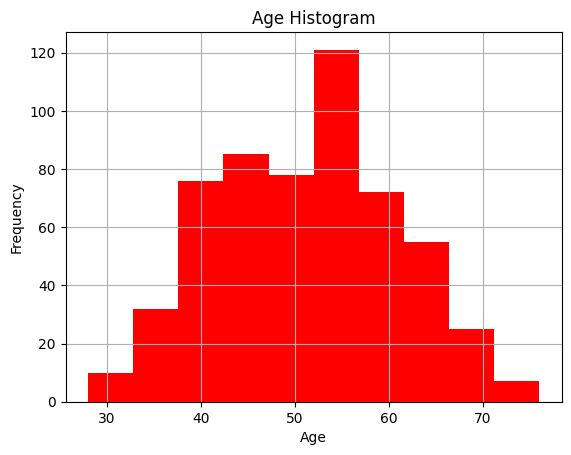

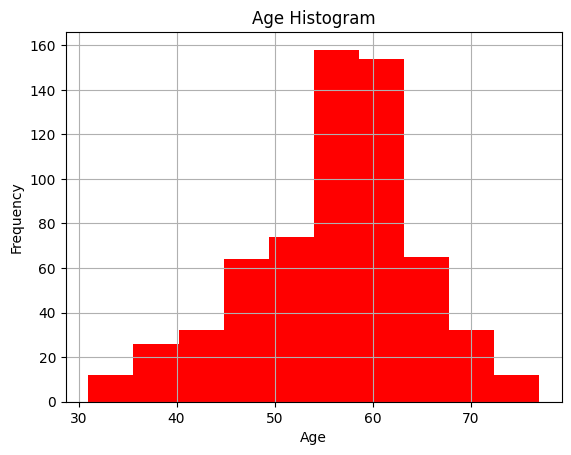

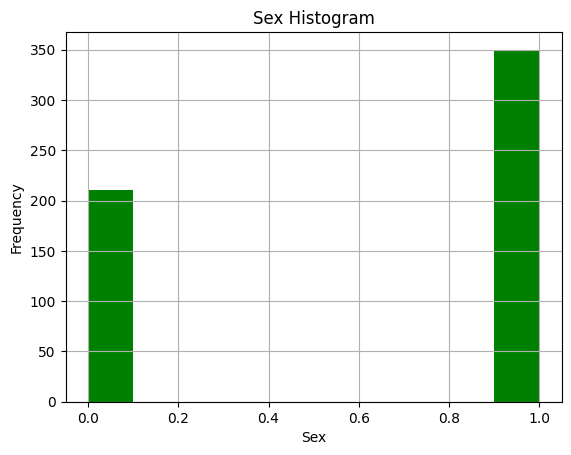

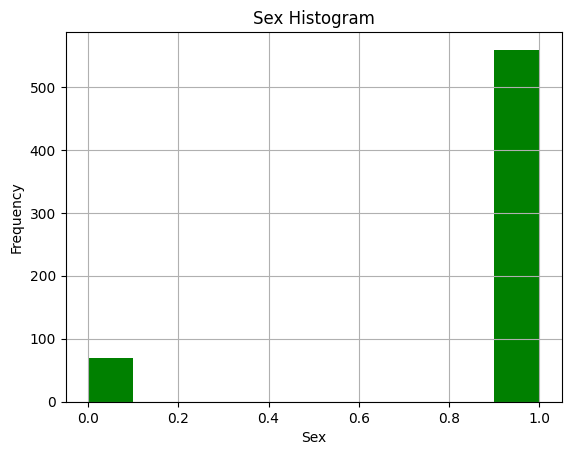

<Figure size 640x480 with 0 Axes>

In [48]:
# plot hist of age and sex for each class
def plot_hist(x , title , y_label , x_label , color):
    plt.hist(x ,color = color )
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.figure()
    
    
df.groupby(['target'])['age'].apply(lambda x: plot_hist(x , 'Age Histogram' , 'Frequency' , 'Age' , color = 'r'))
df.groupby(['target'])['sex'].apply(lambda x: plot_hist(x , 'Sex Histogram' , 'Frequency' , 'Sex' , color = 'g'))

## Z-test

In [117]:
# Make copy
data = df.copy()

# Calculate Z-scores for all columns
z_scores = np.abs(stats.zscore(data))

# Z-score threshold
threshold = 3

# Remove outliers based on the threshold
filtered_data = data[(z_scores < threshold).all(axis=1)]

# Print
print('Size of Raw Dataset:',len(df))
print('Size of Dataset After Z-Test:',len(filtered_data))

Size of Raw Dataset: 1190
Size of Dataset After Z-Test: 1162


In [118]:
# Report Outliers
df1 = df.copy()
df2 = filtered_data.copy()

# Merge DataFrames and include indicator column
merged_df = pd.merge(df1, df2, how='outer', indicator=True)

# Filter rows unique to each DataFrame
outlier_datapoints = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])
# print indexes of outlier datapoints
print("outlier datapoints indexes:")
print(np.array(outlier_datapoints.index))

outlier datapoints indexes:
[  30   76  112  152  169  244  327  368  373  393  402  452  598  625
  626  967  968 1085 1086 1191 1192 1237 1238 1315 1316 1549 1550 1702]


## Normalize

In [119]:
# divide numerical fetures by their maximum values
numerical_features = ['age' ,'resting bp s' ,'cholesterol', 'max heart rate' , 'oldpeak']
normalized_data = filtered_data.copy()
for feature in numerical_features:
    normalized_data[feature] = filtered_data[feature]/filtered_data[feature].max()

## Training

In [120]:
X = np.array(normalized_data.drop(['target'] , axis=1))
y = np.array(normalized_data['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
# performance func
def perform(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Precision: {:.2f}%".format(precision * 100))
    print("Recall: {:.2f}%".format(recall * 100))
    print("F1 Score: {:.2f}".format(f1))

1) **Linear Kernel**

In [122]:
# Train
clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train , y_train)

SVC(kernel='linear')

In [123]:
# validate model on Testset
predicted_labels = clf_linear.predict(X_test)

# performance
perform(y_test, predicted_labels)

Accuracy: 83.67%
Precision: 81.00%
Recall: 89.50%
F1 Score: 0.85


2) **RBF Kernel**

In [128]:
# Train
clf_rbf = SVC(C=3, kernel='rbf',gamma = 10)
clf_rbf.fit(X_train , y_train)

SVC(C=3, gamma=10)

In [129]:
# validate model on Testset
predicted_labels = clf_rbf.predict(X_test)

# performance
perform(y_test, predicted_labels)

Accuracy: 85.67%
Precision: 79.64%
Recall: 97.24%
F1 Score: 0.88


3) **Polynominal Kernel**

In [132]:
# Train
clf_poly = SVC(C=3, kernel='poly',gamma = 1 , degree=7,coef0=3)
clf_poly.fit(X_train , y_train)

SVC(C=3, coef0=3, degree=7, gamma=1, kernel='poly')

In [133]:
# validate model on Testset
predicted_labels = clf_poly.predict(X_test)

# performance
perform(y_test, predicted_labels)

Accuracy: 85.67%
Precision: 84.29%
Recall: 88.95%
F1 Score: 0.87
